#### importing the relevant packages and loading the data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

X = pd.read_csv("dengue_features_train.csv")
y = pd.read_csv("dengue_labels_train.csv")
test = pd.read_csv("dengue_features_test.csv")

In [2]:
# Removing the dates and city info for now
X.drop(['city', 'year', 'weekofyear', 'week_start_date'], axis=1, inplace=True)

### Train Test Split
We shall split our dataset based on time stamps as we are required to make predictions for the future. This gets taken care of as we use shuffle = False while splitting a sorted dataframe

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
# Dropping the rows with null values for now
X.dropna(inplace=True)
# Selecting y values corresponding to the filtered X values
y = y.total_cases.loc[X.index]

# Standardizing the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, shuffle = False)

#### Baseline Model

In [6]:
lr = LinearRegression()

lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

In [7]:
from sklearn.metrics import mean_absolute_error

In [8]:
mean_absolute_error(Y_test, Y_pred)

11.066338883374447

In [9]:
# MAPE, with +1 smoothening
np.mean(np.abs((Y_test - Y_pred + 1) / (Y_test + 1))) * 100

200.51364448205

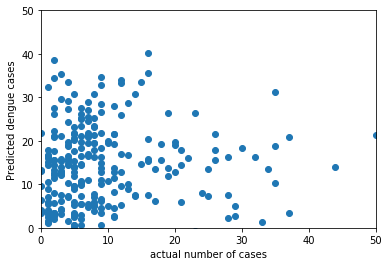

In [10]:
plt.scatter(Y_test, Y_pred)
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel("actual number of cases")
plt.ylabel("Predicted dengue cases")
plt.show()